Реализовать классы нейросетей по аналогии с классом OurNeuralNetwork.
Данные нейросети:
− три входа (𝑥1, 𝑥2, 𝑥3);
− три нейрона в скрытых слоях (ℎ1, ℎ2, ℎ3);
− выход (𝑜1).
Нейроны имеют идентичные веса и пороги:
− 𝑤 = [0.5, 0.5, 0.5]
− 𝑏 = 0
Данные нейросети:
− два входа (𝑥1, 𝑥2);
− два нейрона в скрытых слоях (ℎ1, ℎ2);
− два выхода (𝑜1, 𝑜2).
Нейроны имеют идентичные веса и пороги:
− 𝑤 = [1, 0];
− 𝑏 = 1.

In [ ]:
import numpy as np

def sigmoid(x):
    return 1/(1 + np.exp(-x))

class Neuron:
    def __init__(self, weights, bias):
        self.weights = weights
        self.bias = bias

    def feedforward(self, inputs):
        total = np.dot(self.weights, inputs) + self.bias
        return sigmoid(total)


class NeuralNetwork1:
    def __init__(self):
        weights = np.array ([0.5, 0.5, 0.5])
        bias = 0
        self.h1 = Neuron(weights, bias)
        self.h2 = Neuron(weights, bias)
        self.h3 = Neuron(weights, bias)
        self.o1 = Neuron(weights, bias)

    def feedforward(self, x):
        out_h1 = self.h1.feedforward(x)
        out_h2 = self.h2.feedforward(x)
        out_h3 = self.h3.feedforward(x)

        out_o1 = self.o1.feedforward(np.array([out_h1, out_h2, out_h3]))
        return out_o1


class NeuralNetwork2:
    def __init__(self):
        weights = np.array ([1, 0])
        bias = 1
        self.h1 = Neuron(weights, bias)
        self.h2 = Neuron(weights, bias)
        self.o1 = Neuron(weights, bias)
        self.o2 = Neuron(weights, bias)

    def feedforward(self, x):
        out_h1 = self.h1.feedforward(x)
        out_h2 = self.h2.feedforward(x)

        out_o1 = self.o1.feedforward(np.array([out_h1, out_h2]))
        out_o2 = self.o2.feedforward(np.array([out_h1, out_h2]))
        return (out_o1, out_o2)

In [ ]:
nn1 = NeuralNetwork1()
nn2 = NeuralNetwork2()

print(nn1.feedforward([1, 2, 3]))
print(nn2.feedforward([1, 2]))

0.8067238139969796
(0.8677026536525567, 0.8677026536525567)


Реализуйте классы нейронных сетей с использованием других функций
активации.

![image.png](attachment:image.png)

In [ ]:
import numpy as np

def sigmoid(x):
    return 1/(1 + np.exp(-x))

def tanh(x):
    return np.tanh(x)

def ReLU(x):
    return max(0, x)

In [ ]:
import numpy as np


class Neuron1:
    def __init__(self, weights, bias):
        self.weights = weights
        self.bias = bias

    def feedforward(self, inputs):
        total = np.dot(self.weights, inputs) + self.bias
        return tanh(total)

class Neuron2:
    def __init__(self, weights, bias):
        self.weights = weights
        self.bias = bias

    def feedforward(self, inputs):
        total = np.dot(self.weights, inputs) + self.bias
        return ReLU(total)


class NeuralNetwork1:
    def __init__(self):
        weights = np.array ([0.5, 0.5, 0.5])
        bias = 0
        self.h1 = Neuron1(weights, bias)
        self.h2 = Neuron1(weights, bias)
        self.h3 = Neuron1(weights, bias)
        self.o1 = Neuron1(weights, bias)

    def feedforward(self, x):
        out_h1 = self.h1.feedforward(x)
        out_h2 = self.h2.feedforward(x)
        out_h3 = self.h3.feedforward(x)

        out_o1 = self.o1.feedforward(np.array([out_h1, out_h2, out_h3]))
        return out_o1


class NeuralNetwork2:
    def __init__(self):
        weights = np.array ([1, 0])
        bias = 1
        self.h1 = Neuron2(weights, bias)
        self.h2 = Neuron2(weights, bias)
        self.o1 = Neuron2(weights, bias)
        self.o2 = Neuron2(weights, bias)

    def feedforward(self, x):
        out_h1 = self.h1.feedforward(x)
        out_h2 = self.h2.feedforward(x)

        out_o1 = self.o1.feedforward(np.array([out_h1, out_h2]))
        out_o2 = self.o2.feedforward(np.array([out_h1, out_h2]))
        return (out_o1, out_o2)

In [ ]:
nn1 = NeuralNetwork1()
nn2 = NeuralNetwork2()

print(nn1.feedforward([1, 2, 3]))
print(nn2.feedforward([1, 2]))

0.903798759264991
(3, 3)


Используйте классы MLPClassified и MLPRegressor для классификации и
регрессии произвольных данных из интернета. Проведите анализ
атрибуты, полученных моделей.
Для классификации можете взять набор данных Ирисов:
https://gist.githubusercontent.com/netj/8836201/raw/6f9306ad21398ea43cba4f7d537619d0e07d5ae3/iris.csv
а для регрессии датасет зависимости заработной платы от опыта работы:
https://raw.githubusercontent.com/AnnaShestova/salary-years-simple-linearregression/master/Salary_Data.csv

In [ ]:
import numpy as пр
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.neural_network import MLPRegressor

In [ ]:
data = pd.read_csv("https://gist.githubusercontent.com/netj/8836201/raw/6f9306ad21398ea43cba4f7d537619d0e07d5ae3/iris.csv")

x = data.iloc[:, :-1].values
y = data.iloc[:, -1]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(120, 4) (30, 4) (120,) (30,)


In [ ]:
classifier = MLPClassifier()
classifier.fit(x_train, y_train)
y_pred = classifier.predict(x_test)

print(classifier.score(x_train, y_train))
print(classifier.score(x_test, y_test))

0.95
1.0


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


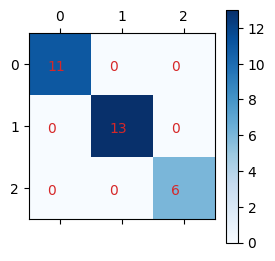

In [ ]:
from sklearn.metrics import confusion_matrix


def plot_confusion_matrix(Y_test, Y_preds):
    l = len(set(Y_preds))
    conf_mat = confusion_matrix(Y_test, Y_preds)
    fig = plt.figure(figsize=(3,3))
    plt.matshow(conf_mat, cmap=plt.cm.Blues, fignum=1)
    plt.yticks(range(l), range(l))
    plt.xticks(range(l), range(l))
    plt.colorbar()
    for i in range(l):
        for j in range(l):
            plt.text(i-0.2,j+0.1, \
                str(conf_mat[j, i]), color='tab:red')


plot_confusion_matrix(y_test, y_pred)

In [ ]:
print("Loss", classifier.loss_)
print("Number of Coefs", len(classifier.coefs_))
print("Number of Intercepts", len(classifier.intercepts_))
print("Number of Iterations for Which Estimator Ran", classifier.n_iter_)
print("Name of Output Layer Activation Function", classifier.out_activation_)

Loss 0.30929405809136556
Number of Coefs 2
Number of Intercepts 2
Number of Iterations for Which Estimator Ran 200
Name of Output Layer Activation Function softmax


In [ ]:
data = pd.read_csv("https://raw.githubusercontent.com/AnnaShestova/salary-years-simple-linear-regression/master/Salary_Data.csv")

x = data.iloc[:, :-1].values
y = data.iloc[:, -1].values

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
# print(x_train[:10])
# print()
# print(x_test[:10])
# print()
# print(y_train[:10])
# print()
# print(y_test[:10])

In [ ]:
regressor = MLPRegressor(hidden_layer_sizes=(200, 100), max_iter=1000)
regressor.fit(x_train, y_train)
y_pred = regressor.predict(x_test)

print(y_pred)

print(regressor.score(x_train, y_train))
print(regressor.score(x_test, y_test))

[ 57634.16502382  28991.34903367  72528.4293387   79402.70517634
  57634.16502382 102316.95796846]
0.8927525878944308
0.9269425902301025


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


In [ ]:
print("Loss", regressor.loss_)
print("Number of Coefs", len(regressor.coefs_))
print("Number of Intercepts", len(regressor.intercepts_))
print("Number of Iterations for Which Estimator Ran", regressor.n_iter_)
print("Name of Output Layer Activation Function", regressor.out_activation_)

Loss 41957066.632026404
Number of Coefs 3
Number of Intercepts 3
Number of Iterations for Which Estimator Ran 1000
Name of Output Layer Activation Function identity


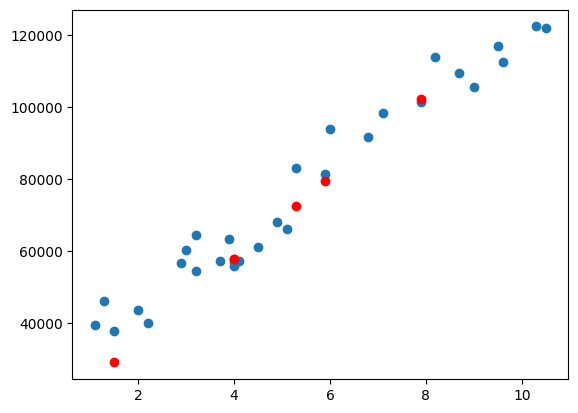

In [ ]:
plt.figure()
plt.scatter(x, y)
plt.scatter(x_test, y_pred, c='r')
plt.show()